# Loading test data

* Test cases often need test data. 
* Thankfully, there’s a simple way to specify test data for Behave directly in your feature file using the `Background` section. 
* In `Background`, you can specify the initial state of the data you want to start with. 
* The only problem is that the data doesn’t load itself; you need to load it manually. 
* You might ask, **“How do I do that?”**
* Luckily, Behave puts the data in a variable in the `context` called table. 
* That means you can iterate over context.table and extract the data. 
* Let’s see how you do this.

# Example feature

We’ll start by looking at an example **Feature: Search for pets by category feature**. 
* Notice that it has a **Background** section that says, **“Given the following pets”** and includes a table of pets delimited by vertical bars.
* The first row of this table contains the column names: `name`, `category`, and `available`. 
* When Behave loads these into `context.table`, each row will be a Python dictionary with a `name` key, `category` key, and `available` key. 
* Thus, you can pull the data from the table by using the **column** names. 
* The rest of the table is data that gets loaded into `context.table`. 
* Each row will be a dictionary with the data for that row.

# Loading data from `context.table`

Let’s look at the code needed in your steps file to load the data. 

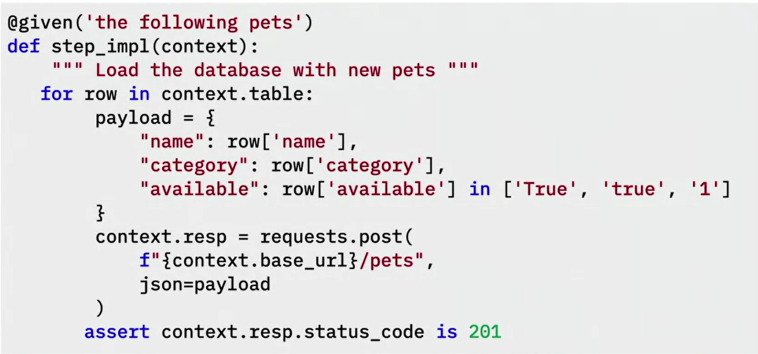

You start with the decorator `@given` with the string **“the following pets”** 
* This line will match the statement **“Given the following pets”** in the feature file.
* Next, you define a function to implement this step, pass in the `context`, and add an appropriate **docstring**.
* Now, you want to iterate over `context.table` using a for loop. 
* This loop will give you back every row in the table as a dictionary named row.

Next, you create a variable called `payload`. 
* `Payload` is also a Python dictionary, and you will start to fill it with the **columns** from the table.
* You start by making a key called `name`. 
* For the value, you assign the data from the current row that also has the key called `name`. 
* You take the same approach with `category`. 
* You create a key called category and assign it the data from the current row that has a key called `category`. 
* It’s pretty straightforward. 

The `available` field is a little different because it’s a **Boolean**: “`True`” if the pet is available, “`False`” if it is not. 
* So, you need to convert the table data from a string to a **Boolean**. 
* You start by creating a key called `available`. 
* You then assign it the data from the current row that has a key called `available`, but you don’t stop there.
* You evaluate this data to include strings `True`, `true` and `1`. 
* In other words, data of either of those strings will evaluate to the **Boolean** `True` and set available to `True`.

Now that you have your payload dictionary with the `name`, `category`, and `available` data.
* You need to create a pet from it.
* Because you are remote from the server you are testing, you must make an HTTP request to the server’s REST API. 

To do this, you make a post request to your service’s REST API to create a pet.
* The first argument is a string composed of the `base_url` in the `context` followed by **`/pets`**. 
* You use **`/pets`** because it’s the endpoint for creating a pet in a RESTful API.
* You specify a second argument as **`json=payload`**, which will send the Python dictionary called **`payload`** as a **JSON** string to the REST API. 
* Notice that you are saving the response from this post in the `context` so that other steps can examine it if needed.

Finally, you `assert` that the status code in the response is a `201`, which is the status code for a successful creation for a REST API.

All this code is just one example of how to use a table in a `Background` section to populate databases with test data.
